In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh


def a_hole():
    hbar = 1.0545718e-34
    eV = 1.60218e-19
    m = 9.10938356e-31
    a = 1e-9
    U0 = 5 * eV
    L = 3 * a
    N = 1000

    x = np.linspace(-L / 2, L / 2, N)
    dx = x[1] - x[0]

    V = np.zeros_like(x)
    for i in range(N):
        if abs(x[i]) < a / 2:
            V[i] = -U0
        else:
            V[i] = 0

    diag = hbar ** 2 / (2 * m * dx ** 2)
    H = np.zeros((N, N))
    for i in range(N):
        H[i, i] = 2 * diag + V[i]
        if i > 0:
            H[i, i - 1] = -diag
        if i < N - 1:
            H[i, i + 1] = -diag

    eigvals, eigvecs = eigh(H)
    energies = eigvals / eV
    eigvecs = eigvecs / np.sqrt(dx)

    bound_states_mask = energies < 0
    bound_energies = energies[bound_states_mask]
    bound_eigvecs = eigvecs[:, bound_states_mask]

    print("Уровни энергии внутри потенциальной ямы (в эВ):", bound_energies)

    plt.figure(figsize=(10, 6))
    for i in range(len(bound_energies)):
        plt.plot(x * 1e9, bound_eigvecs[:, i] / np.max(np.abs(bound_eigvecs[:, i])) * 0.5 + bound_energies[i],
                 label=f"E[{i + 1}]={bound_energies[i]:.2f} эВ")

    plt.plot(x * 1e9, V / eV, 'k--', label='Потенциал V(x)')

    plt.title("Собственные функции и уровни энергии в конечной параболической яме")
    plt.xlabel("x, нм")
    plt.ylabel("Энергия, эВ")
    plt.ylim(-U0 / eV - 1, 1)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.grid()
    plt.show()



Уровни энергии внутри потенциальной ямы (в эВ): [-4.72820952 -3.92266629 -2.62096008 -0.94091937]


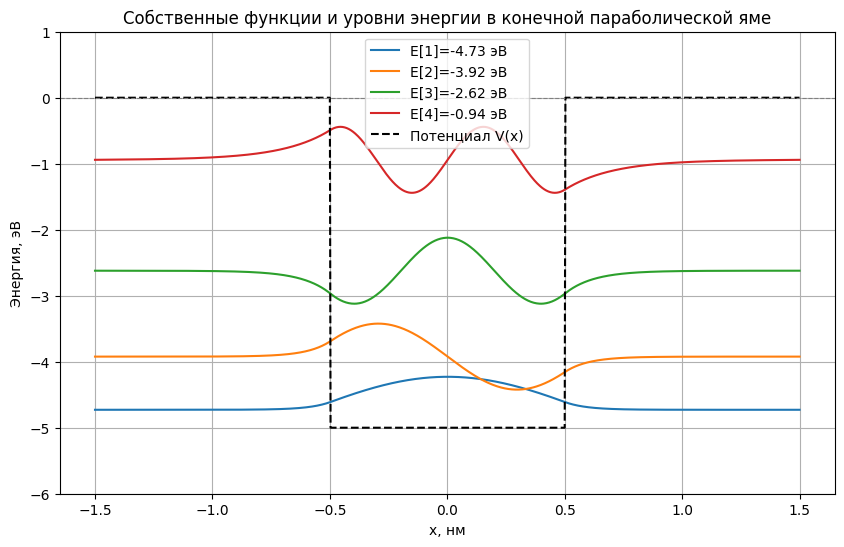

In [2]:
a_hole()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def a_b():
    def U(x):
        U0 = 5e-20
        sigma = 0.5e-9
        return U0 * np.exp(-x ** 2 / (2 * sigma ** 2))

    E = 4.5e-20
    m = 9.1e-31
    hbar = 1.054e-34

    def k(x):
        return np.sqrt(2 * m * (U(x) - E)) / hbar if U(x) > E else 0

    x = np.linspace(-2e-9, 2e-9, 1000)
    x1 = x[np.argmax(U(x) > E)]
    x2 = x[::-1][np.argmax(U(x[::-1]) > E)]

    integral, _ = quad(k, x1, x2)
    T = np.exp(-2 * integral)

    print(f"Вероятность туннелирования: T = {round(T, 2)}")

    plt.figure(figsize=(8, 5))
    plt.plot(x, U(x), label="$U(x)$", color="black")
    plt.axhline(E, color="red", linestyle="--", label="$E$")
    plt.title("Прохождение частицы через потенциальный барьер")
    plt.xlabel("$x$, м")
    plt.ylabel("$U$, Дж")
    plt.legend()
    plt.grid()
    plt.show()


Вероятность туннелирования: T = 0.52


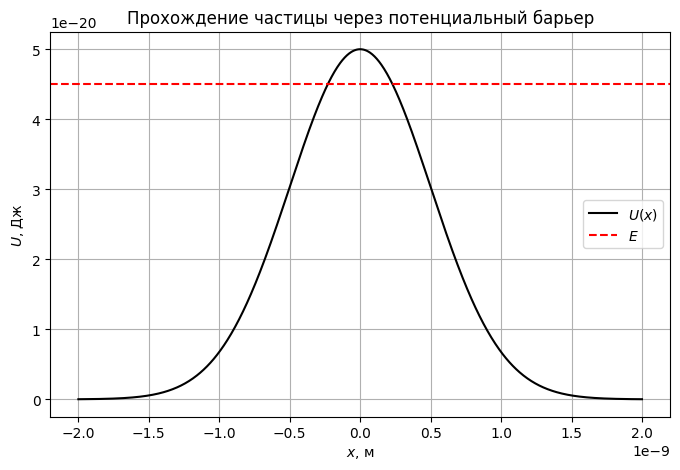

In [6]:
a_b()